In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timezone
import help

# Empresa alvo
target_ticker = "^GSPC"
# Índice de mercado
market_ticker = "GOLD"

day, month, year = datetime.now().day, datetime.now().month, datetime.now().year
start_date_1 = f"{year-99}-{month}-{day}"
end_date = f"{year}-{month}-{day}"

dataset = help.dowl_data_return_dataset(target_ticker, market_ticker, start_date_1, end_date)
dataset.fillna(1)
dataset

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker,^GSPC,GOLD
Date,,
1927-12-30,17.660000,NaN
1928-01-03,17.760000,NaN
1928-01-04,17.719999,NaN
1928-01-05,17.549999,NaN
1928-01-06,17.660000,NaN
...,...,...
2025-03-24,5767.569824,18.889999
2025-03-25,5776.649902,19.350000
2025-03-26,5712.200195,19.309999


In [61]:
percentagens_dataset = help.calc_returns_daily(dataset)
percentagens_dataset

Ticker,^GSPC,GOLD
Date,,
1985-02-14,-0.005127,0.000000
1985-02-15,-0.004441,0.000000
1985-02-19,-0.001487,0.000000
1985-02-20,-0.000827,0.000000
1985-02-21,-0.005464,0.000000
...,...,...
2025-03-24,0.017646,0.001060
2025-03-25,0.001574,0.024352
2025-03-26,-0.011157,-0.002067


In [ ]:
correlation_by_year = {}
for years_ago in range(41):
    new_data = percentagens_dataset[percentagens_dataset.index.year == year-years_ago]
    corr = help.calc_corr(new_data)
    correlation_by_year[f'{year-years_ago}'] = corr
print(correlation_by_year)

{'2025': np.float64(0.29661599026810725), '2024': np.float64(0.33833034184573824), '2023': np.float64(0.17394587064004766), '2022': np.float64(0.3108970052407626), '2021': np.float64(0.21215018650670062), '2020': np.float64(0.274098427416746), '2019': np.float64(-0.18402655632179352), '2018': np.float64(0.05598644327808468), '2017': np.float64(-0.06500443834612611), '2016': np.float64(-0.15071667187970364), '2015': np.float64(0.17613968001138486), '2014': np.float64(0.127653192867698), '2013': np.float64(0.1855136308143513), '2012': np.float64(0.2406733417480459), '2011': np.float64(0.35306268792453543), '2010': np.float64(0.3401714245530201), '2009': np.float64(0.20713666294737235), '2008': np.float64(0.2769982422851466), '2007': np.float64(0.4999678235248896), '2006': np.float64(0.37785684323881724), '2005': np.float64(0.16665222281770734)}


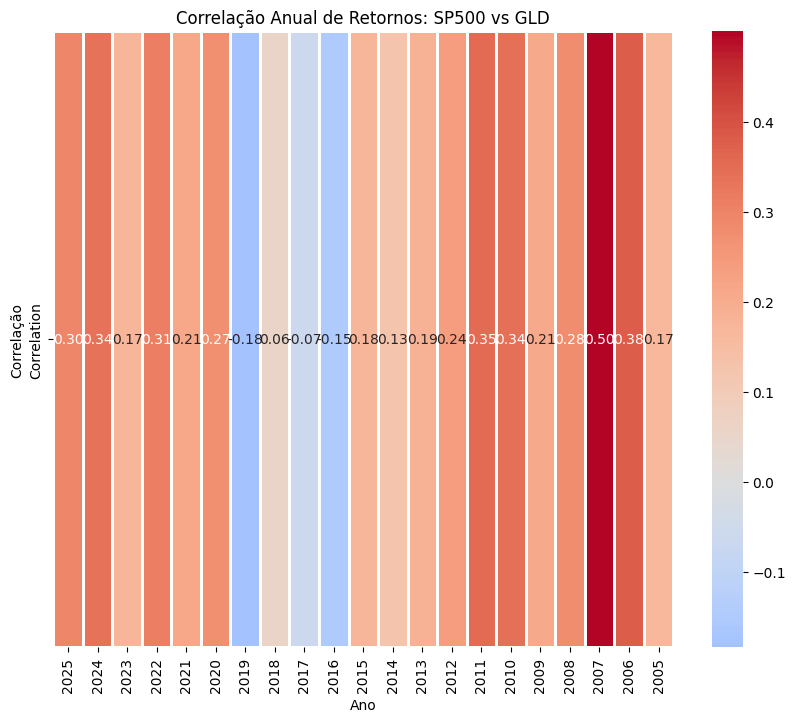

In [63]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timezone

# Criar um DataFrame a partir do dicionário de correlações
correlation_df = pd.DataFrame(list(correlation_by_year.items()), columns=['Year', 'Correlation'])
correlation_df.set_index('Year', inplace=True)

# Gerar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.T, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=1, cbar=True)

# Personalizar o gráfico
plt.title('Correlação Anual de Retornos: SP500 vs GLD')
plt.xlabel('Ano')
plt.ylabel('Correlação')

# Exibir o gráfico
plt.show()

In [64]:
# Calcular retornos diários
returns = help.calc_returns_daily(dataset)

# Calcular a correlação
correlation = help.calc_corr(returns)

print(f"Correlação de {target_ticker} com {market_ticker}: {correlation:.4f}")

Correlação de ^GSPC com GOLD: 0.1281


In [65]:
import pandas as pd
import requests

def get_sp500_symbols(n=500):
    # URL da fonte alternativa com os componentes do S&P 500
    url = "https://datahub.io/core/s-and-p-500-companies/r/0.csv"
    
    try:
        df = pd.read_csv(url)
        symbols = df["Symbol"].head(n).tolist()
        return symbols
    except Exception as e:
        print(f"Erro ao obter os dados: {e}")
        return []

if __name__ == "__main__":
    symbols = get_sp500_symbols()
    print(symbols)


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BRK.B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'D

In [66]:
lista = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'DECK', 'DE', 'DELL', 'DAL', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DG', 'DLTR', 'D', 'DPZ', 'DASH', 'DOV', 'DOW', 'DHI', 'DTE', 'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ERIE', 'ESS', 'EL', 'EG', 'EVRG', 'ES', 'EXC', 'EXE', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FI', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GE', 'GEHC', 'GEV', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GDDY', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JBL', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KKR', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LII', 'LLY', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PLTR', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SW', 'SNA', 'SOLV', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SMCI', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TER', 'TSLA', 'TXN', 'TPL', 'TXT', 'TMO', 'TJX', 'TKO', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UBER', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VTRS', 'VICI', 'V', 'VST', 'VMC', 'WRB', 'GWW', 'WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WY', 'WSM', 'WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL', 'YUM']
lista1 = lista[:50]
lista2 = lista[50:100]
lista3 = lista[100:150]
lista4 = lista[150:200]
lista5 = lista[200:250]
lista6 = lista[250:300]
lista7 = lista[300:350]
lista8 = lista[350:400]
lista9 = lista[400:450]
lista10 = lista[450:]
lista = [lista1, lista2, lista3, lista4, lista5,lista6, lista7, lista8, lista9, lista10]
print('META' in lista)

False


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


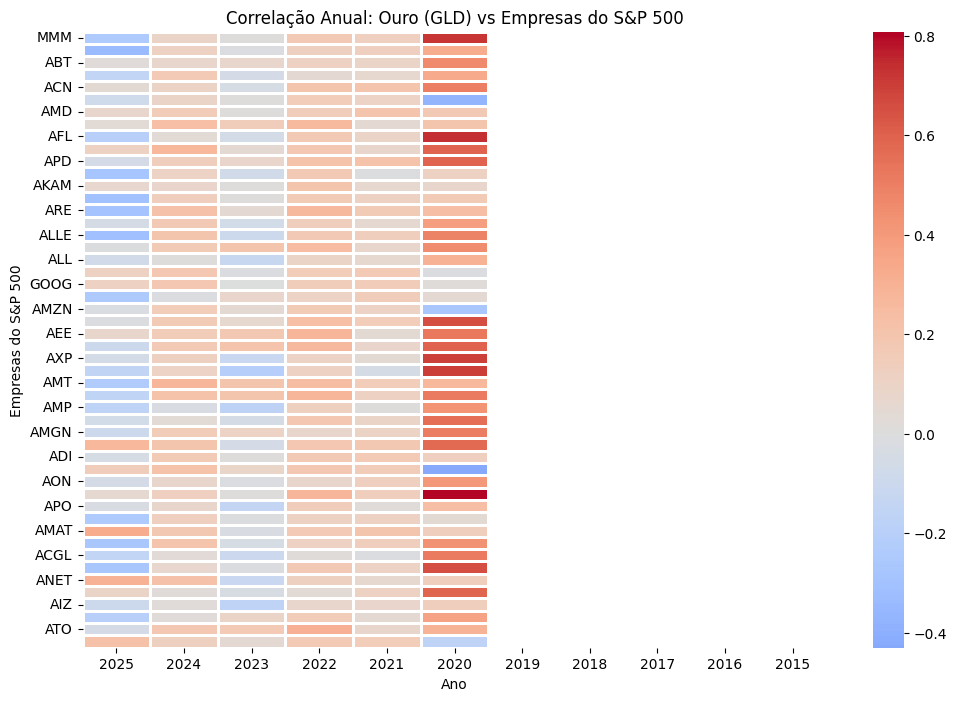

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


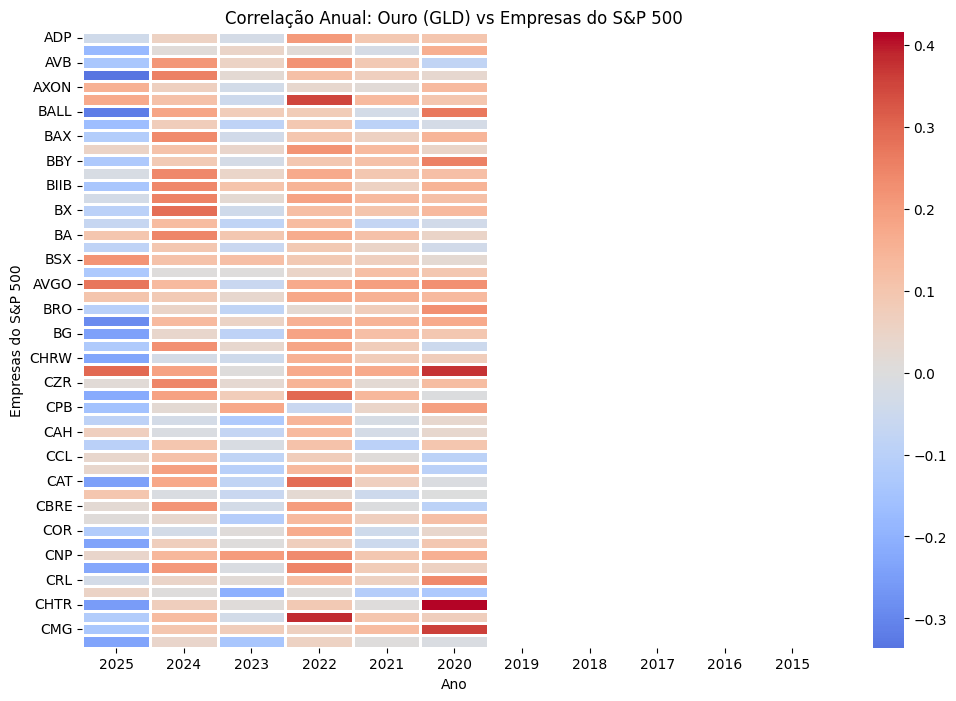

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


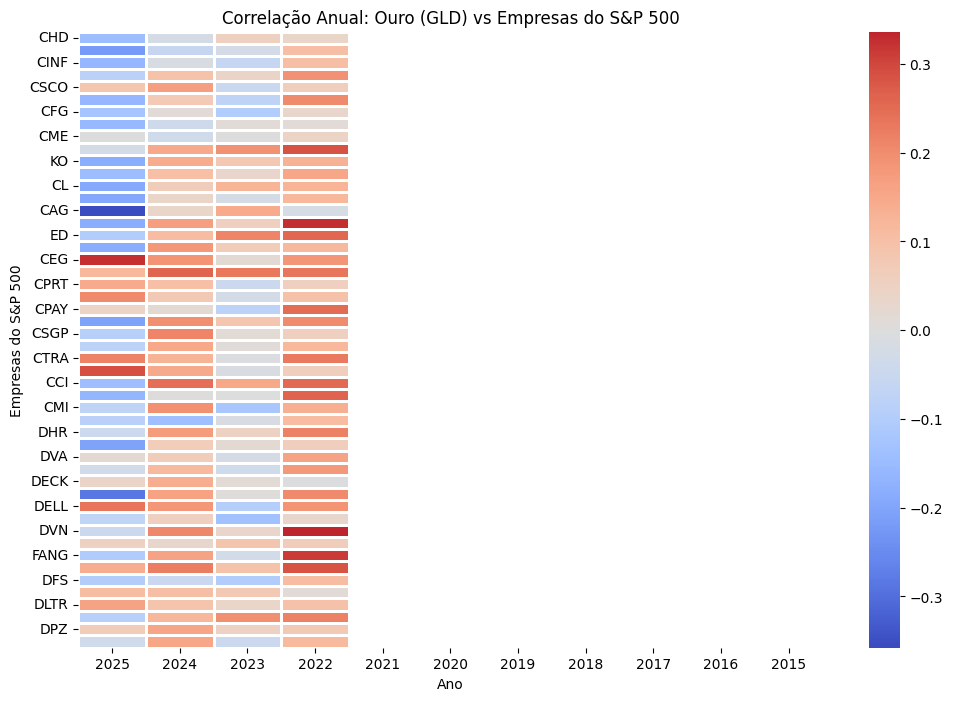

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


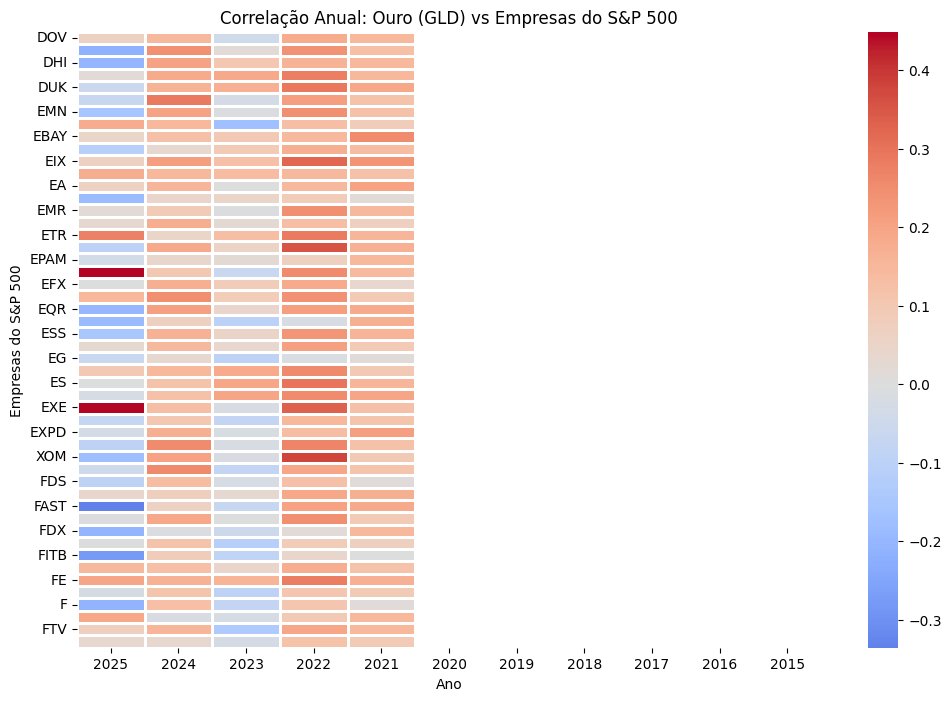

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


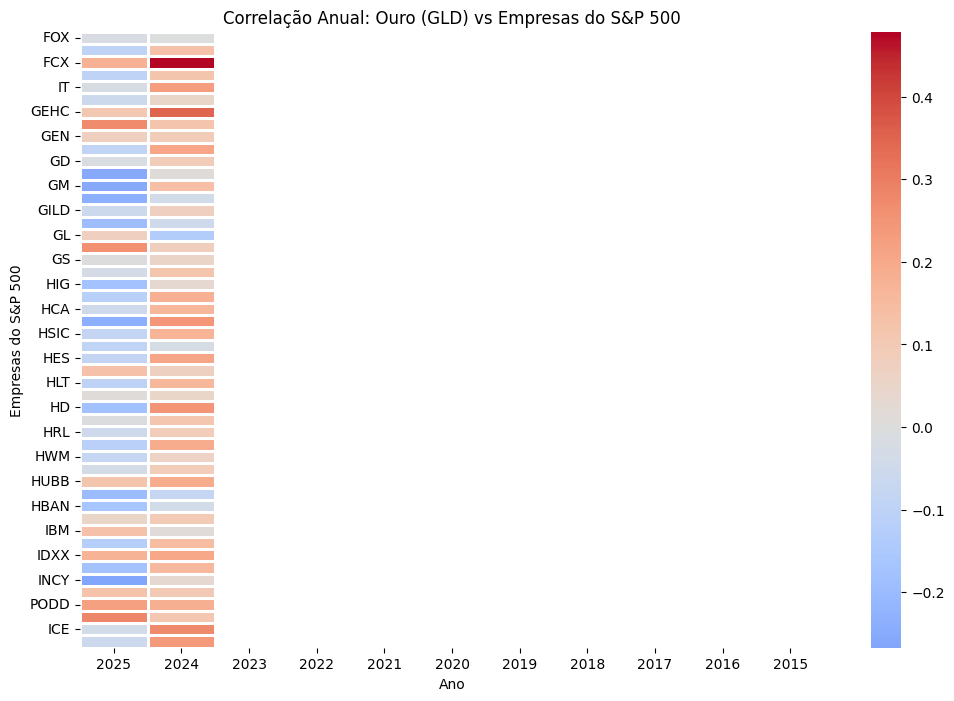

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


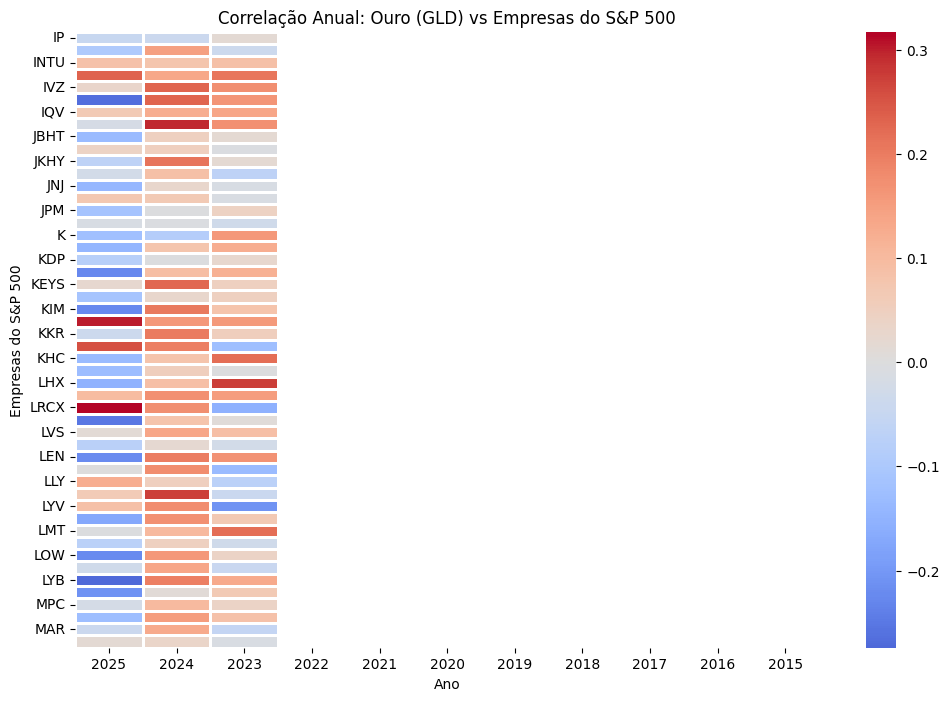

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


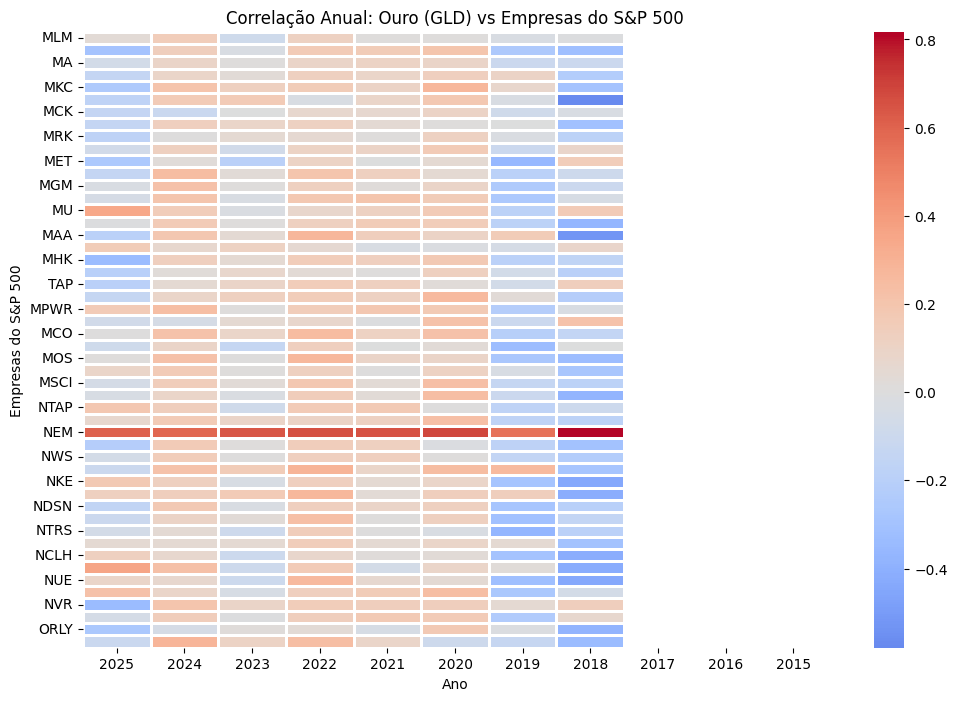

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


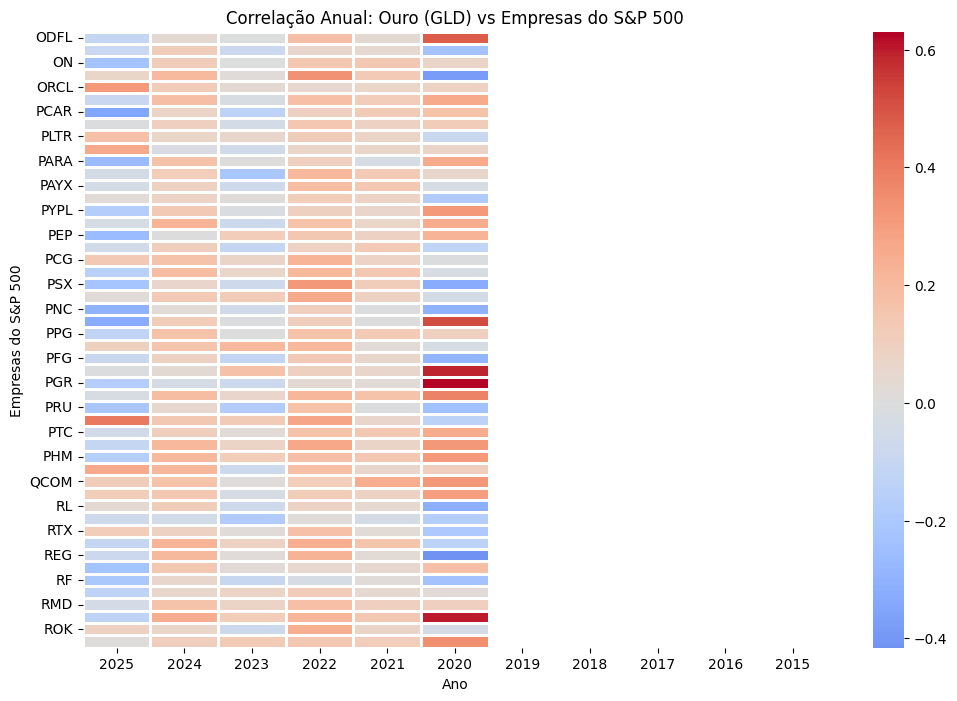

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  50 of 50 completed


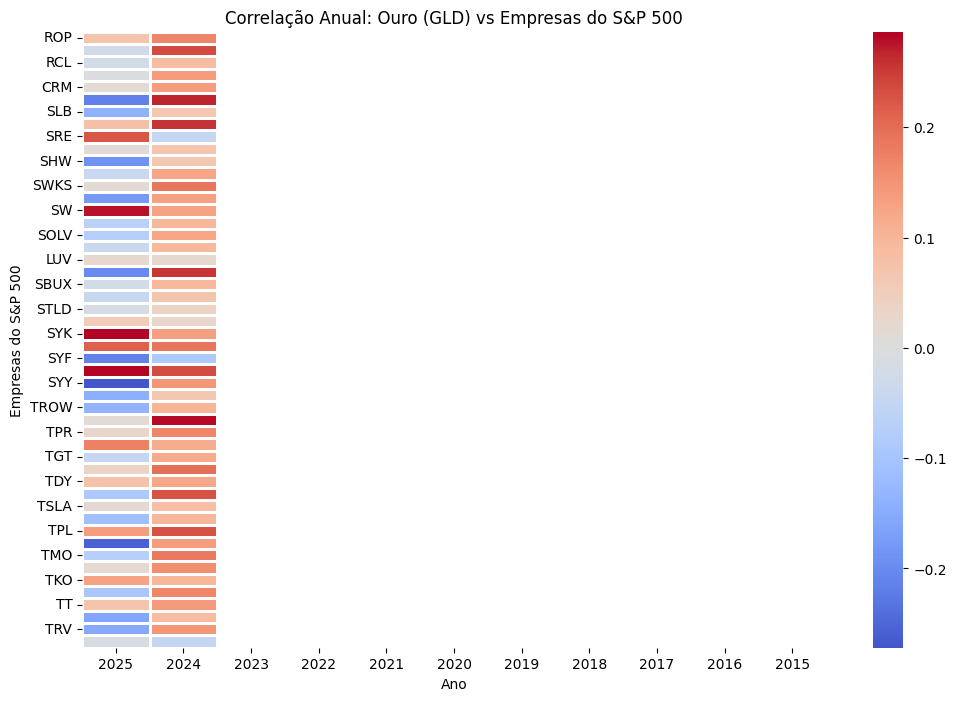

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  48 of 48 completed


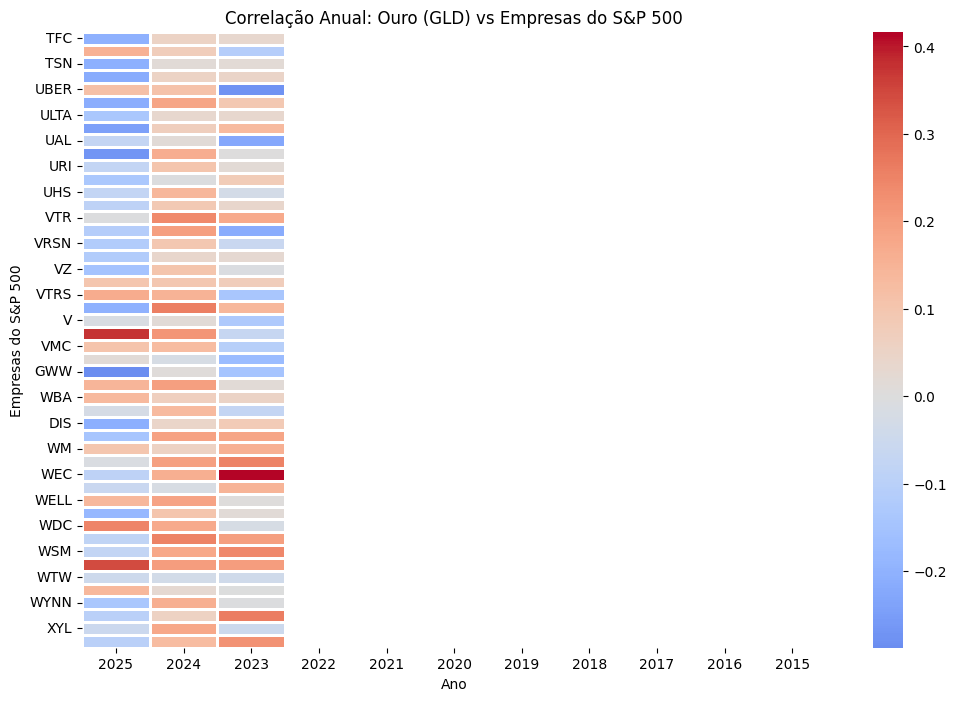

In [67]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import help



# Empresa alvo (ouro)
gold_ticker = "GLD"

# Baixar os dados históricos para as empresas do S&P 500 + GLD
day, month, year = datetime.now().day, datetime.now().month, datetime.now().year
start_date = f"{year-10}-{month}-{day}"  # Começo de 20 anos atrás
end_date = f"{year}-{month}-{day}"

for listinha in lista:
    # Lista de tickers das empresas do S&P 500 (Exemplo com alguns tickers - pode ser expandido)
    sp500_tickers = listinha
        
    # Baixar os dados
    dataset = help.dowl_data_return_dataset(gold_ticker, sp500_tickers, start_date, end_date)

    # Calcular as percentagens diárias
    percentagens_dataset = help.calc_returns_daily(dataset)

    # Calcular as correlações anuais
    correlation_by_year = {}
    for years_ago in range(11):
        # Filtrar os dados para o ano específico
        new_data = percentagens_dataset[percentagens_dataset.index.year == year - years_ago]
        
        # Calcular a correlação entre o ouro (GLD) e todas as empresas do S&P 500
        correlations = {}
        for ticker in sp500_tickers:
            corr = new_data[ticker].corr(new_data[gold_ticker])  # Correlação direta
            correlations[ticker] = corr
        
        correlation_by_year[f'{year - years_ago}'] = correlations

    # Transformar as correlações em um DataFrame para visualização
    correlation_df = pd.DataFrame(correlation_by_year)

    # Gerar o heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_df, annot=False, cmap='coolwarm', center=0, fmt=".2f", linewidths=1, cbar=True)

    # Personalizar o gráfico
    plt.title('Correlação Anual: Ouro (GLD) vs Empresas do S&P 500')
    plt.xlabel('Ano')
    plt.ylabel('Empresas do S&P 500')

    # Exibir o gráfico
    plt.show()

In [68]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import help

# Lista de tickers das empresas do S&P 500 (Exemplo com alguns tickers - pode ser expandido)
sp500_tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX', 'BDX', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BLDR', 'BG', 'BXP', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY', 'DECK', 'DE', 'DELL', 'DAL', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DG', 'DLTR', 'D', 'DPZ', 'DASH', 'DOV', 'DOW', 'DHI', 'DTE', 'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ERIE', 'ESS', 'EL', 'EG', 'EVRG', 'ES', 'EXC', 'EXE', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FI', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GE', 'GEHC', 'GEV', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GDDY', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JBL', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KKR', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LII', 'LLY', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PLTR', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SW', 'SNA', 'SOLV', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SMCI', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TER', 'TSLA', 'TXN', 'TPL', 'TXT', 'TMO', 'TJX', 'TKO', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UBER', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VTRS', 'VICI', 'V', 'VST', 'VMC', 'WRB', 'GWW', 'WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WY', 'WSM', 'WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL', 'YUM']
#sp500_tickers = sp500_tickers[:20]

# Empresa alvo (ouro)
gold_ticker = "GLD"

# Baixar os dados históricos para as empresas do S&P 500 + GLD
day, month, year = datetime.now().day, datetime.now().month, datetime.now().year
start_date = f"{year-99}-{month}-{day}"  # Começo de 10 anos atrás
end_date = f"{year}-{month}-{day}"

# Baixar os dados
dataset = help.dowl_data_return_dataset(gold_ticker, sp500_tickers, start_date, end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  498 of 498 completed


In [69]:
dataset.loc[dataset.index.year == 2006]


Ticker,GLD,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WRB,WSM,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,53.119999,20.185068,2.249498,NaN,NaN,12.153681,5.819499,21.023676,38.520000,23.132481,...,6.857084,14.036690,10.889892,63.136925,12.726989,29.138517,9.152485,30.437778,NaN,11.661346
2006-01-04,53.299999,20.239300,2.256117,NaN,NaN,12.172118,5.849082,21.138491,38.419998,23.346783,...,7.020891,13.734200,10.654073,63.792618,13.034472,29.084496,9.196846,30.489832,NaN,11.761128
2006-01-05,52.340000,20.769543,2.238361,NaN,NaN,12.328844,5.763502,21.296347,38.070000,24.090565,...,6.994060,13.573307,10.691970,62.826332,12.919884,28.911667,9.191916,30.338860,NaN,12.262506
2006-01-06,53.720001,20.877998,2.296142,NaN,NaN,12.565470,5.870214,22.351118,39.000000,24.185091,...,7.054776,13.669837,10.683553,62.067093,12.938984,29.187115,9.226417,30.937529,NaN,12.227583
2006-01-09,54.599998,20.817739,2.288617,NaN,NaN,13.032561,5.816329,22.286537,38.380001,24.525467,...,7.122558,14.010947,10.776194,64.586372,12.908426,30.564379,9.201771,30.921898,NaN,12.322369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-12-22,61.650002,21.563597,2.473694,NaN,NaN,15.062588,7.250072,26.444365,40.750000,20.675159,...,7.447725,10.344301,21.689976,70.544708,13.888446,51.912792,11.842942,40.020103,NaN,14.813939
2006-12-26,61.980000,21.870548,2.452929,NaN,NaN,15.220375,7.278600,26.335531,41.439999,20.790739,...,7.458366,10.405953,21.993366,71.143570,13.967518,52.483894,11.895988,40.359760,NaN,14.806378
2006-12-27,62.220001,22.190300,2.453231,NaN,NaN,15.463373,7.256413,26.516903,41.790001,21.021889,...,7.434956,10.386480,22.275385,71.099304,14.074251,54.087620,11.962933,40.842678,NaN,14.919809


In [70]:

# Preencher dados ausentes com zeros
dataset = dataset.fillna(1)
dataset


Ticker,GLD,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WRB,WSM,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.091803,1.000000,1.000000
1962-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.093167,1.000000,1.000000
1962-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.093394,1.000000,1.000000
1962-01-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.091349,1.000000,1.000000
1962-01-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.091121,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,277.250000,121.970001,220.729996,209.169998,129.820007,127.209999,94.010002,307.179993,394.470001,212.339996,...,64.099998,170.300003,231.899994,337.220001,29.559999,84.870003,68.860001,115.800003,120.800003,155.820007
2025-03-25,278.470001,120.510002,223.750000,201.339996,129.880005,125.599998,94.580002,308.899994,403.640015,213.580002,...,64.419998,169.169998,225.800003,337.929993,29.200001,86.029999,67.930000,116.589996,123.089996,155.800003
2025-03-26,278.239990,119.900002,221.529999,201.300003,128.639999,126.610001,95.930000,311.160004,397.809998,210.529999,...,65.239998,165.360001,224.910004,338.589996,29.420000,85.830002,68.919998,118.269997,123.129997,158.679993


/home/pedro-maltez-ubuntu/Documents/PIC2/forecasting_jupiter/correlation/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/pedro-maltez-ubuntu/Documents/PIC2/forecasting_jupiter/correlation/venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


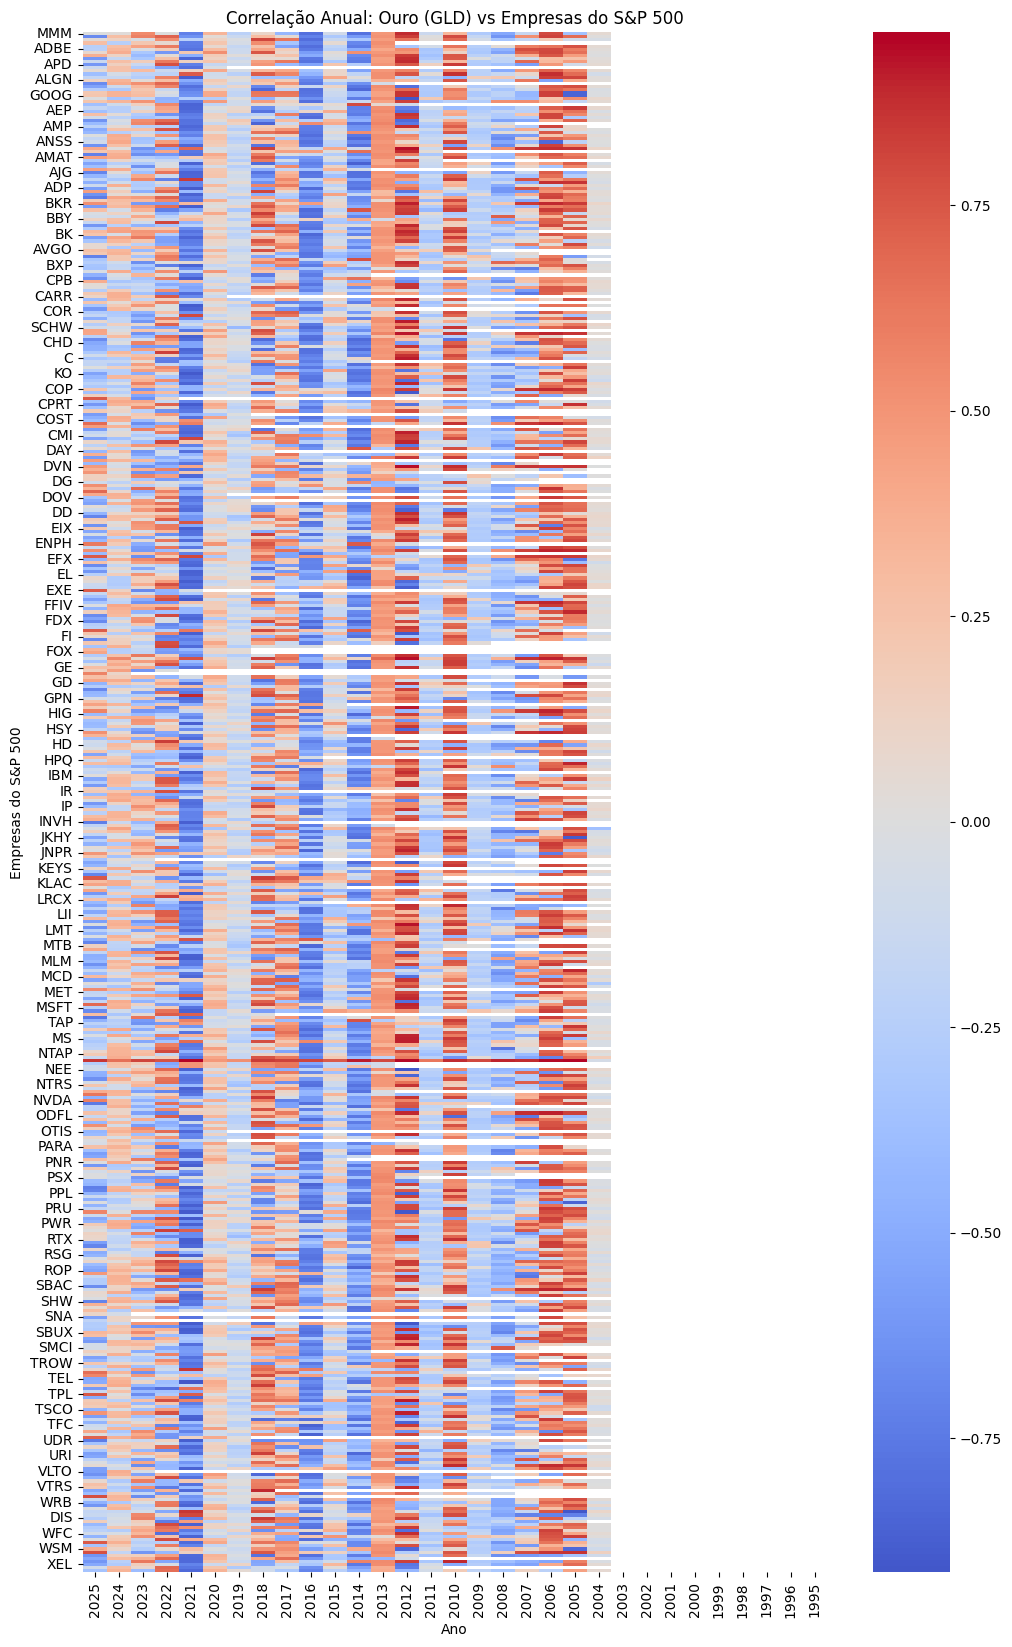

In [71]:


# Calcular as percentagens diárias
percentagens_dataset = help.calc_returns_daily(dataset)

# Calcular as correlações anuais
correlation_by_year = {}
for years_ago in range(31):
    # Filtrar os dados para o ano específico
    new_data = percentagens_dataset[percentagens_dataset.index.year == year - years_ago]
    
    # Garantir que todas as ações têm os mesmos índices de datas
    new_data = new_data.reindex(pd.date_range(start=start_date, end=end_date, freq='B'), method='bfill')  # ou 'bfill'
    
    # Calcular a correlação entre o ouro (GLD) e todas as empresas do S&P 500
    correlations = {}
    for ticker in sp500_tickers:
        corr = new_data[ticker].corr(new_data[gold_ticker])  # Correlação direta
        correlations[ticker] = corr
    
    correlation_by_year[f'{year - years_ago}'] = correlations

# Transformar as correlações em um DataFrame para visualização
correlation_df = pd.DataFrame(correlation_by_year)

# Gerar o heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(correlation_df, annot=False, cmap='coolwarm', center=0, fmt=".2f", linewidths=0, cbar=True)

# Personalizar o gráfico
plt.title('Correlação Anual: Ouro (GLD) vs Empresas do S&P 500')
plt.xlabel('Ano')
plt.ylabel('Empresas do S&P 500')

# Exibir o gráfico
plt.show()

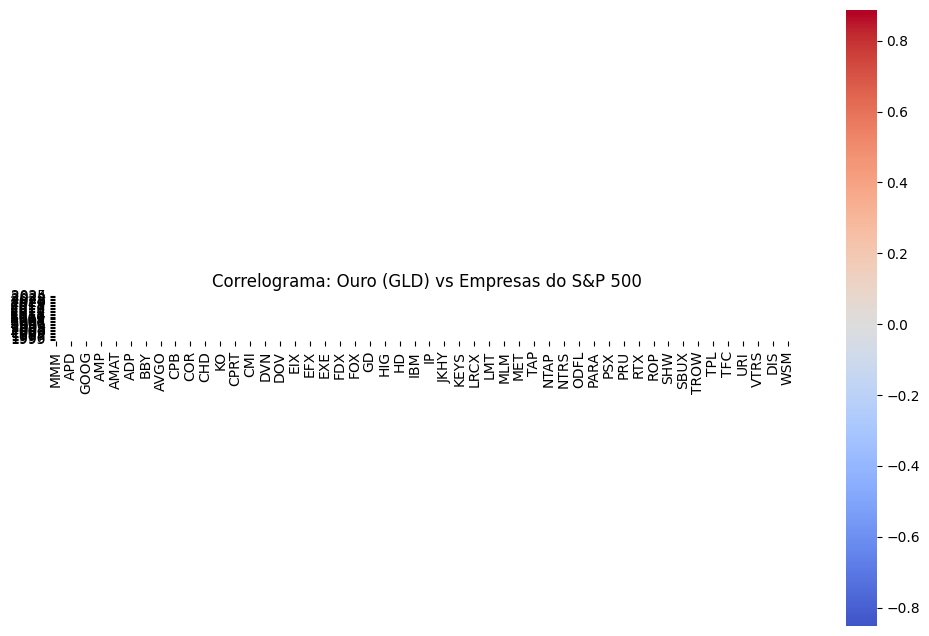

In [72]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a matriz de correlação
corr = correlation_df.T  # Transpor para ter os anos no eixo X

# Criar a figura
plt.figure(figsize=(12, 8))

# Criar o correlograma
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=1, cbar=True, 
            square=True, mask=np.triu(np.ones(corr.shape), k=1))  

# Melhorar a visualização
plt.xticks(rotation=90)  # Rodar os anos no eixo X para facilitar a leitura
plt.yticks(rotation=0)   # Manter os tickers das ações na horizontal
plt.title('Correlograma: Ouro (GLD) vs Empresas do S&P 500')

# Mostrar o gráfico
plt.show()
